In [6]:
from LinearRegression_gradient import LinearRegression_gradient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


test modelu - dane wygenerowane

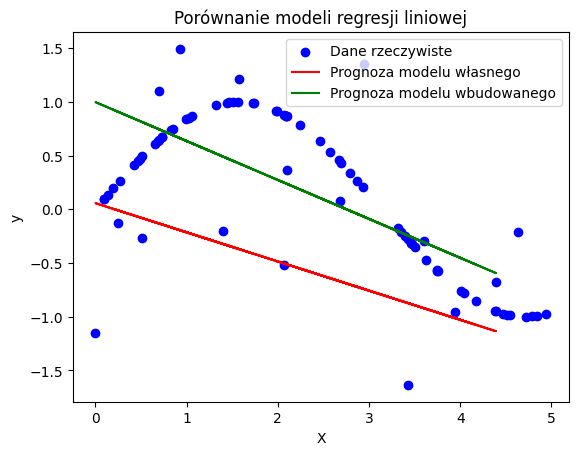

Wyniki modelu własnego:
Mean Squered Error : 0.8792, R²: -0.5527

Wyniki modelu wbudowanego:
Mean Squered Error: 0.5609, R²: 0.0095


In [11]:
# przykładowe dane
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

#trening i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_custom = LinearRegression_gradient()
model_custom.fit(X_train, y_train)
predictions_cust = model_custom.predict(X_test)

model_built = LinearRegression()
model_built.fit(X_train, y_train)
pred_built = model_built.predict(X_test)

#metryki + wizulizacja
mse_custom = mean_squared_error(y_test, predictions_cust)
r2_custom = r2_score(y_test, predictions_cust)
mse_built = mean_squared_error(y_test, pred_built)
r2_built = r2_score(y_test, pred_built)

plt.scatter(X, y, color='blue', label='Dane rzeczywiste')
plt.plot(X_test, predictions_cust, color='red', label='Prognoza modelu własnego')
plt.plot(X_test, pred_built, color='green', label='Prognoza modelu wbudowanego')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Porównanie modeli regresji liniowej')
plt.legend()
plt.show()

print("Wyniki modelu własnego:")
print(f"Mean Squered Error : {mse_custom:.4f}, R²: {r2_custom:.4f}")
print("\nWyniki modelu wbudowanego:")
print(f"Mean Squered Error: {mse_built:.4f}, R²: {r2_built:.4f}")

testowanie na innych zbiorach danych

In [9]:
data = pd.read_csv('Walmart_Store_sales.csv')
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


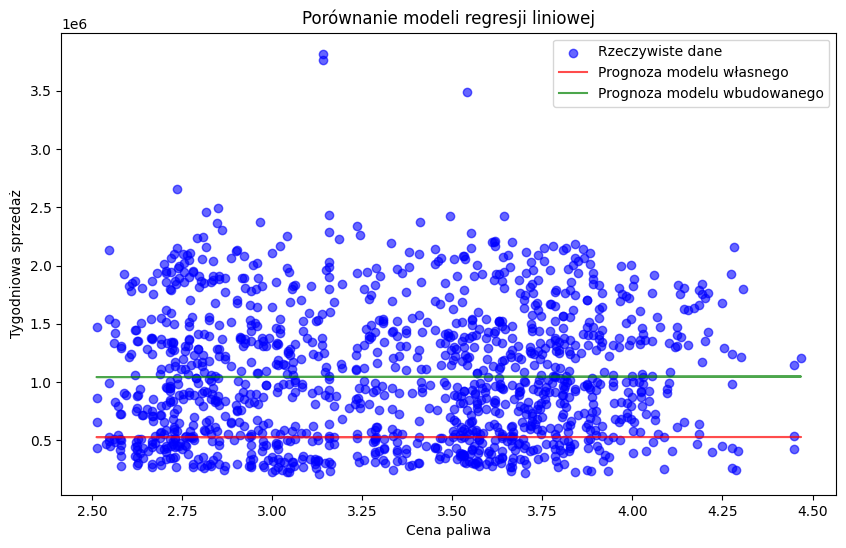

Wyniki modelu własnego:
Mean Squered Error: 599660184641.0165, R²: -0.8614

Wyniki modelu wbudowanego:
Mean Squered Error: 322204752658.9954, R²: -0.0002


In [ ]:
X = data[['Fuel_Price']].values 
y = data['Weekly_Sales'].values   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treningi modelu 
model_built = LinearRegression()
model_built.fit(X_train, y_train)

model_custom = LinearRegression_gradient()
model_custom.fit(X_train, y_train)

#Predykcja i ocena 
pred_built = model_built.predict(X_test)
mse_built = mean_squared_error(y_test, pred_built)
r2_built = r2_score(y_test, pred_built)

predictions_custom = model_custom.predict(X_test)
mse_custom = mean_squared_error(y_test, predictions_custom)
r2_custom = r2_score(y_test, predictions_custom)

#Wizualizacja + wyniki
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste dane', alpha=0.6)
plt.plot(X_test, predictions_custom, color='red', label='Prognoza modelu własnego', alpha=0.7)
plt.plot(X_test, pred_built, color='green', label='Prognoza modelu wbudowanego', alpha=0.7)
plt.xlabel("Cena paliwa")
plt.ylabel("Tygodniowa sprzedaż")
plt.title("Porównanie modeli regresji liniowej")
plt.legend()
plt.show()

print("Wyniki modelu własnego:")
print(f"Mean Squered Error: {mse_custom:.4f}, R²: {r2_custom:.4f}")
print("\nWyniki modelu wbudowanego:")
print(f"Mean Squered Error: {mse_built:.4f}, R²: {r2_built:.4f}")

In [35]:
data = pd.read_csv('House_Price.csv')
print(data.head())  
data.isnull().sum() 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

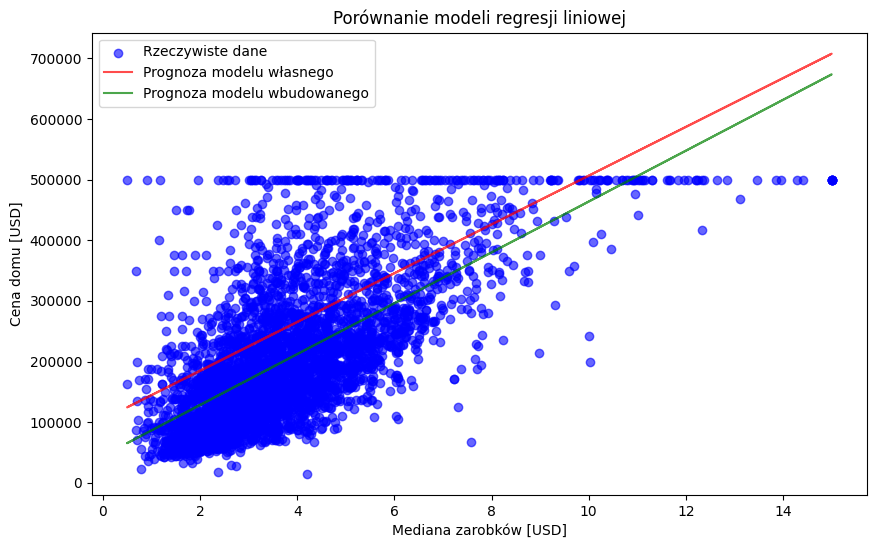

Wyniki modelu własnego:
Mean Squered Error: 9887872214.1722, R²: 0.2454

Wyniki modelu wbudowanego:
Mean Squered Error: 7091157771.7655, R²: 0.4589


In [26]:
X = data[['median_income']].values 
y = data['median_house_value'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Trening
model_built = LinearRegression()
model_built.fit(X_train, y_train)

model_custom = LinearRegression_gradient()
model_custom.fit(X_train, y_train)

#Predykcja + wizualizacja
pred_built = model_built.predict(X_test)
mse_built = mean_squared_error(y_test, pred_built)
r2_built = r2_score(y_test, pred_built)

predictions_custom = model_custom.predict(X_test)
mse_custom = mean_squared_error(y_test, predictions_custom)
r2_custom = r2_score(y_test, predictions_custom)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste dane', alpha=0.6)
plt.plot(X_test, predictions_custom, color='red', label='Prognoza modelu własnego', alpha=0.7)
plt.plot(X_test, pred_built, color='green', label='Prognoza modelu wbudowanego', alpha=0.7)
plt.xlabel("Mediana zarobków [USD]")
plt.ylabel("Cena domu [USD]")
plt.title("Porównanie modeli regresji liniowej")
plt.legend()
plt.show()

# 9. Wyświetlenie wyników
print("Wyniki modelu własnego:")
print(f"Mean Squered Error: {mse_custom:.4f}, R²: {r2_custom:.4f}")
print("\nWyniki modelu wbudowanego:")
print(f"Mean Squered Error: {mse_built:.4f}, R²: {r2_built:.4f}")

In [42]:
data = pd.read_csv('insurance.csv')
print(data.head())  
data.isnull().sum() 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

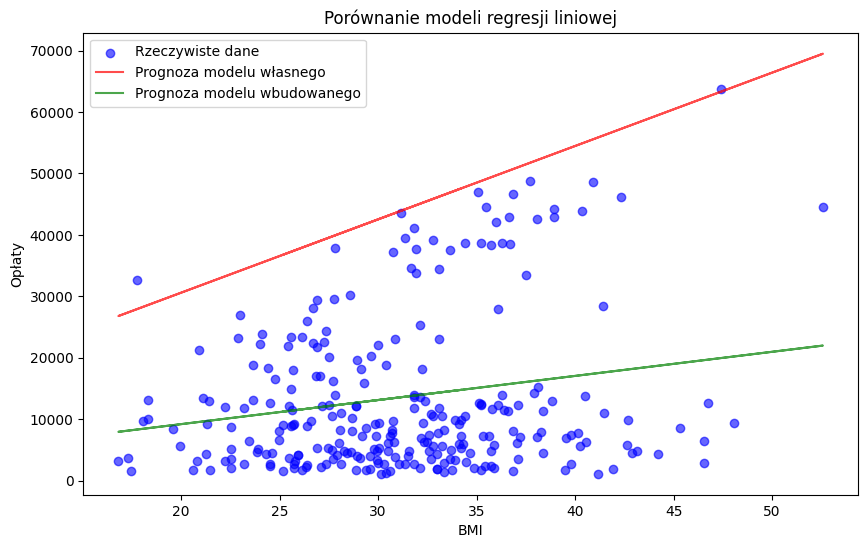

Wyniki modelu własnego:
Mean Squered Error: 1125033516.1964, R²: -6.2467

Wyniki modelu wbudowanego:
Mean Squered Error: 149085057.0384, R²: 0.0397


In [44]:
X = data[['bmi']].values 
y = data['charges'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Trening
model_built = LinearRegression()
model_built.fit(X_train, y_train)

model_custom = LinearRegression_gradient()
model_custom.fit(X_train, y_train)

#Predykcja + wizualizacja
pred_built = model_built.predict(X_test)
mse_built = mean_squared_error(y_test, pred_built)
r2_built = r2_score(y_test, pred_built)

predictions_custom = model_custom.predict(X_test)
mse_custom = mean_squared_error(y_test, predictions_custom)
r2_custom = r2_score(y_test, predictions_custom)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste dane', alpha=0.6)
plt.plot(X_test, predictions_custom, color='red', label='Prognoza modelu własnego', alpha=0.7)
plt.plot(X_test, pred_built, color='green', label='Prognoza modelu wbudowanego', alpha=0.7)
plt.xlabel("BMI")
plt.ylabel("Opłaty")
plt.title("Porównanie modeli regresji liniowej")
plt.legend()
plt.show()

# 9. Wyświetlenie wyników
print("Wyniki modelu własnego:")
print(f"Mean Squered Error: {mse_custom:.4f}, R²: {r2_custom:.4f}")
print("\nWyniki modelu wbudowanego:")
print(f"Mean Squered Error: {mse_built:.4f}, R²: {r2_built:.4f}")